# 6.4 Machine Learning Part 1¶

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/crystalosuna/Documents/Gun Violence Analysis'

In [6]:
#Import gun violence data

df= pd.read_csv (os.path.join(path, 'Data', 'gun-violence-data-clean3.csv'), index_col = False)

In [7]:
df.shape

(140226, 26)

In [8]:
df.columns

Index(['Unnamed: 0', '0', 'incident_id', 'date', 'state', 'city_or_county',
       'Killed', 'Injured', 'congressional_district', 'gun_type',
       'incident_characteristics', 'Gang Related', 'Mass shooting?',
       'number_guns_involved', 'participant_age', 'participant_age_group',
       'participant_gender', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district', 'latitude',
       'longitude', 'year', 'month', 'loss'],
      dtype='object')

/var/folders/xd/drqthjd9059gd5kl114ffjhr0000gn/T/ipykernel_46002/1840880231.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loss'], bins=50)


<Axes: xlabel='loss', ylabel='Density'>

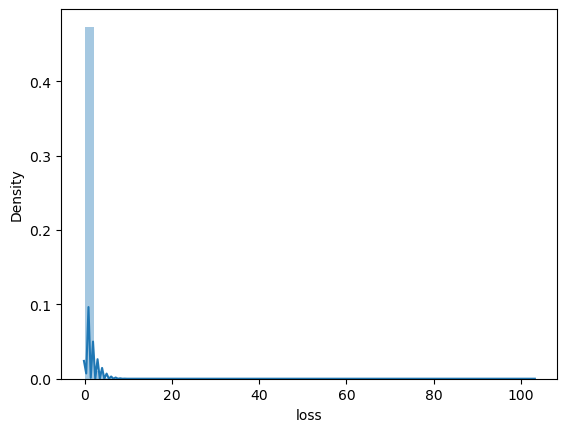

In [9]:
# Shows extreme values
sns.distplot(df['loss'], bins=50)


In [10]:
df['loss'].mean()

0.7055396288848003

In [11]:
df['loss'].median()

1.0

In [12]:
df['loss'].max()

103

/var/folders/xd/drqthjd9059gd5kl114ffjhr0000gn/T/ipykernel_46002/1144112317.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_guns_involved'], bins=50)


<Axes: xlabel='number_guns_involved', ylabel='Density'>

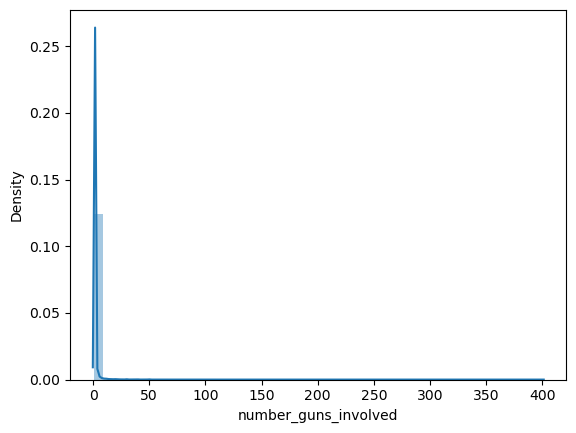

In [15]:
# Shows extreme values
sns.distplot(df['number_guns_involved'], bins=50)

In [17]:
df['number_guns_involved'].mean()

1.3724416299402393

In [18]:
df['number_guns_involved'].median()

1.0

In [19]:
df['number_guns_involved'].max()

400

In [25]:
# Clean the extreme values from the "number_guns_involved" variable observed during the consistency checks.

df= df[df['number_guns_involved'] <=20] 

/var/folders/xd/drqthjd9059gd5kl114ffjhr0000gn/T/ipykernel_46002/3158191826.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_guns_involved'], bins=20)


<Axes: xlabel='number_guns_involved', ylabel='Density'>

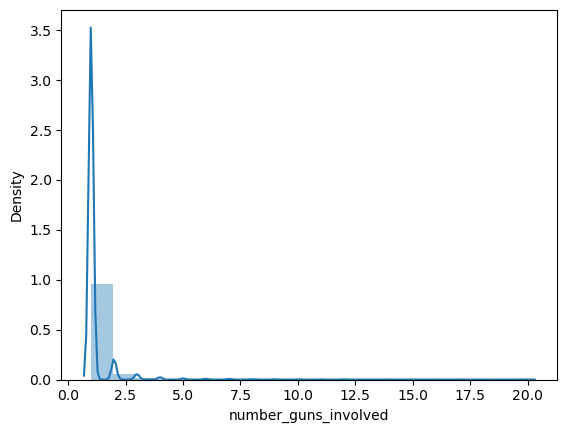

In [26]:
# Shows extreme values
sns.distplot(df['number_guns_involved'], bins=20)

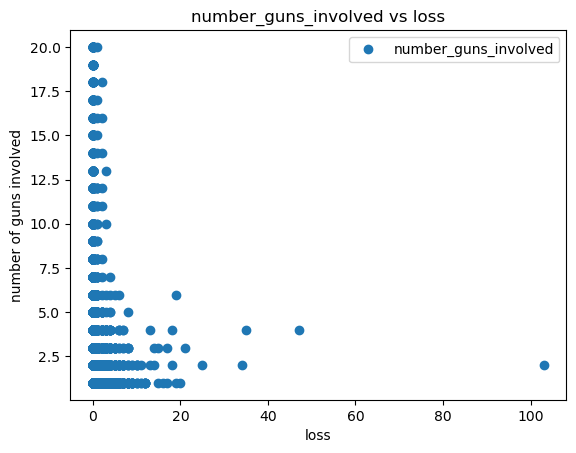

In [27]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'loss', y='number_guns_involved',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('number_guns_involved vs loss')  
plt.xlabel('loss')  
plt.ylabel('number of guns involved')  
plt.show()

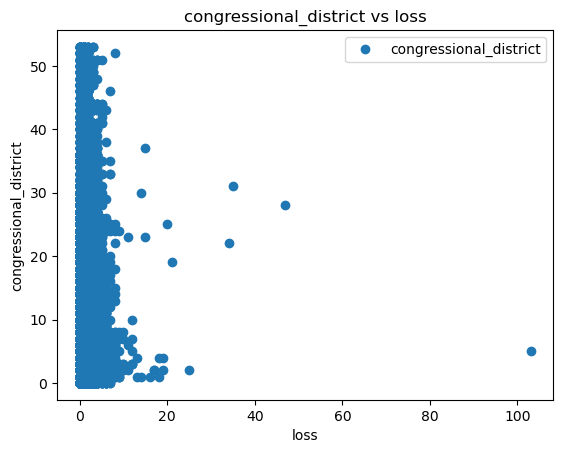

In [28]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'loss', y='congressional_district',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('congressional_district vs loss')  
plt.xlabel('loss')  
plt.ylabel('congressional_district')  
plt.show()

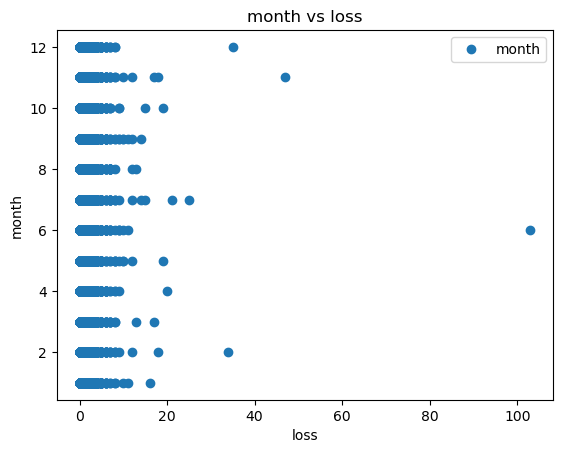

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'loss', y='month',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('month vs loss')  
plt.xlabel('loss')  
plt.ylabel('month')  
plt.show()

Hypothesis

If there is a larger number of guns involved then the number of losses will be greater.

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['number_guns_involved'].values.reshape(-1,1)
y = df['loss'].values.reshape(-1,1)

In [34]:
X

array([[2],
       [2],
       [2],
       ...,
       [1],
       [1],
       [2]])

In [35]:
y

array([[4],
       [4],
       [5],
       ...,
       [1],
       [1],
       [2]])

In [36]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
# Create a regression object.

regression = LinearRegression() 

In [38]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

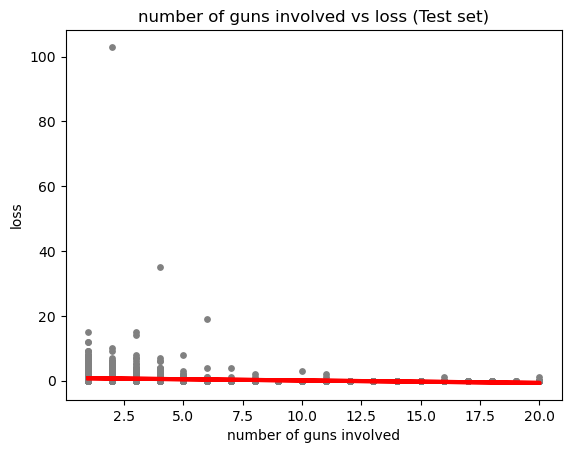

In [42]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('number of guns involved vs loss (Test set)')
plot_test.xlabel('number of guns involved')
plot_test.ylabel('loss')
plot_test.show()

The line appears to be straight horizontal or slightly go down.

In [43]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [44]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.07600392]]
Mean squared error:  0.9161658980527718
R2 score:  0.006940183197962191


In [45]:
y_predicted

array([[0.72204136],
       [0.72204136],
       [0.72204136],
       ...,
       [0.72204136],
       [0.72204136],
       [0.72204136]])

In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,0.722041
1,0,0.722041
2,0,0.722041
3,1,0.722041
4,0,0.722041
5,0,0.570034
6,0,0.722041
7,1,0.722041
8,1,0.722041
9,0,0.722041


Based on the plot test there still seems to be outliers for the number of guns involved. I should have excluded a up to 10 guns involved because more than 10 seems a bit unrealistic and could be because of response bias in the data collection. Overall, the number of actual and predicted are not too far off. 